In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA   
from statsmodels.tsa.stattools import adfuller   
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import median_absolute_error, mean_squared_error

In [165]:
df = pd.read_csv('BrentOilPrices.csv' )

In [166]:
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [167]:
df['Date'] = pd.to_datetime(df['Date'])

In [168]:
df = df.set_index('Date')

In [169]:
df = df.sort_index()

In [170]:
df.isnull().sum()

Price    0
dtype: int64

In [171]:
df.isna().sum()

Price    0
dtype: int64

In [172]:
df = df.asfreq('D')

In [173]:
df = df.ffill()

In [174]:
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,18.55
1987-05-24,18.55
...,...
2022-11-10,94.25
2022-11-11,96.37
2022-11-12,96.37


<AxesSubplot:xlabel='Date'>

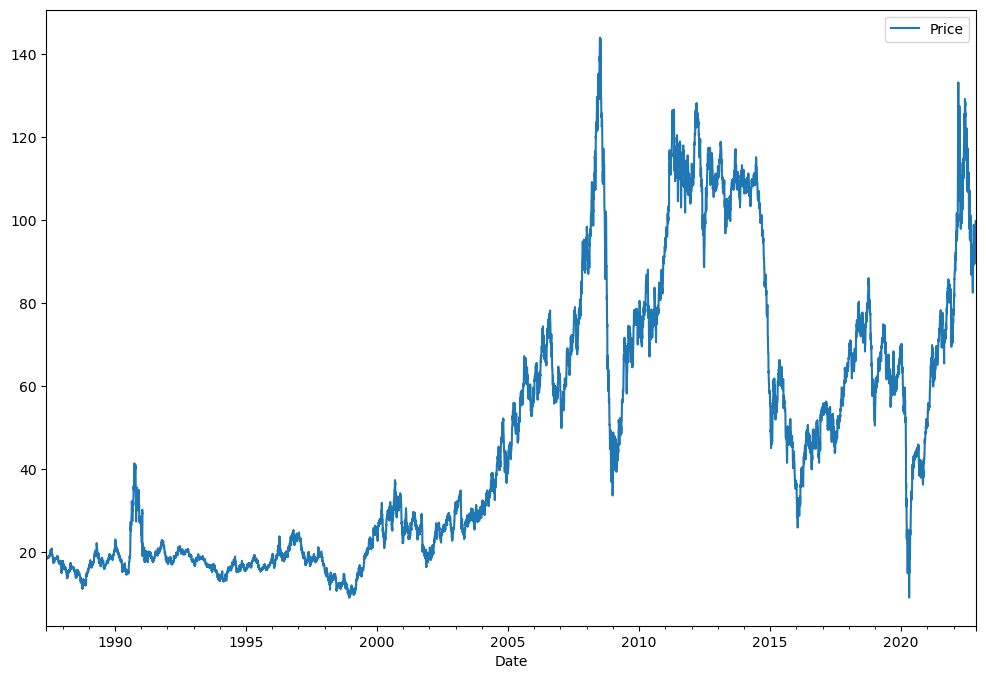

In [175]:
df.plot(figsize=(12, 8))

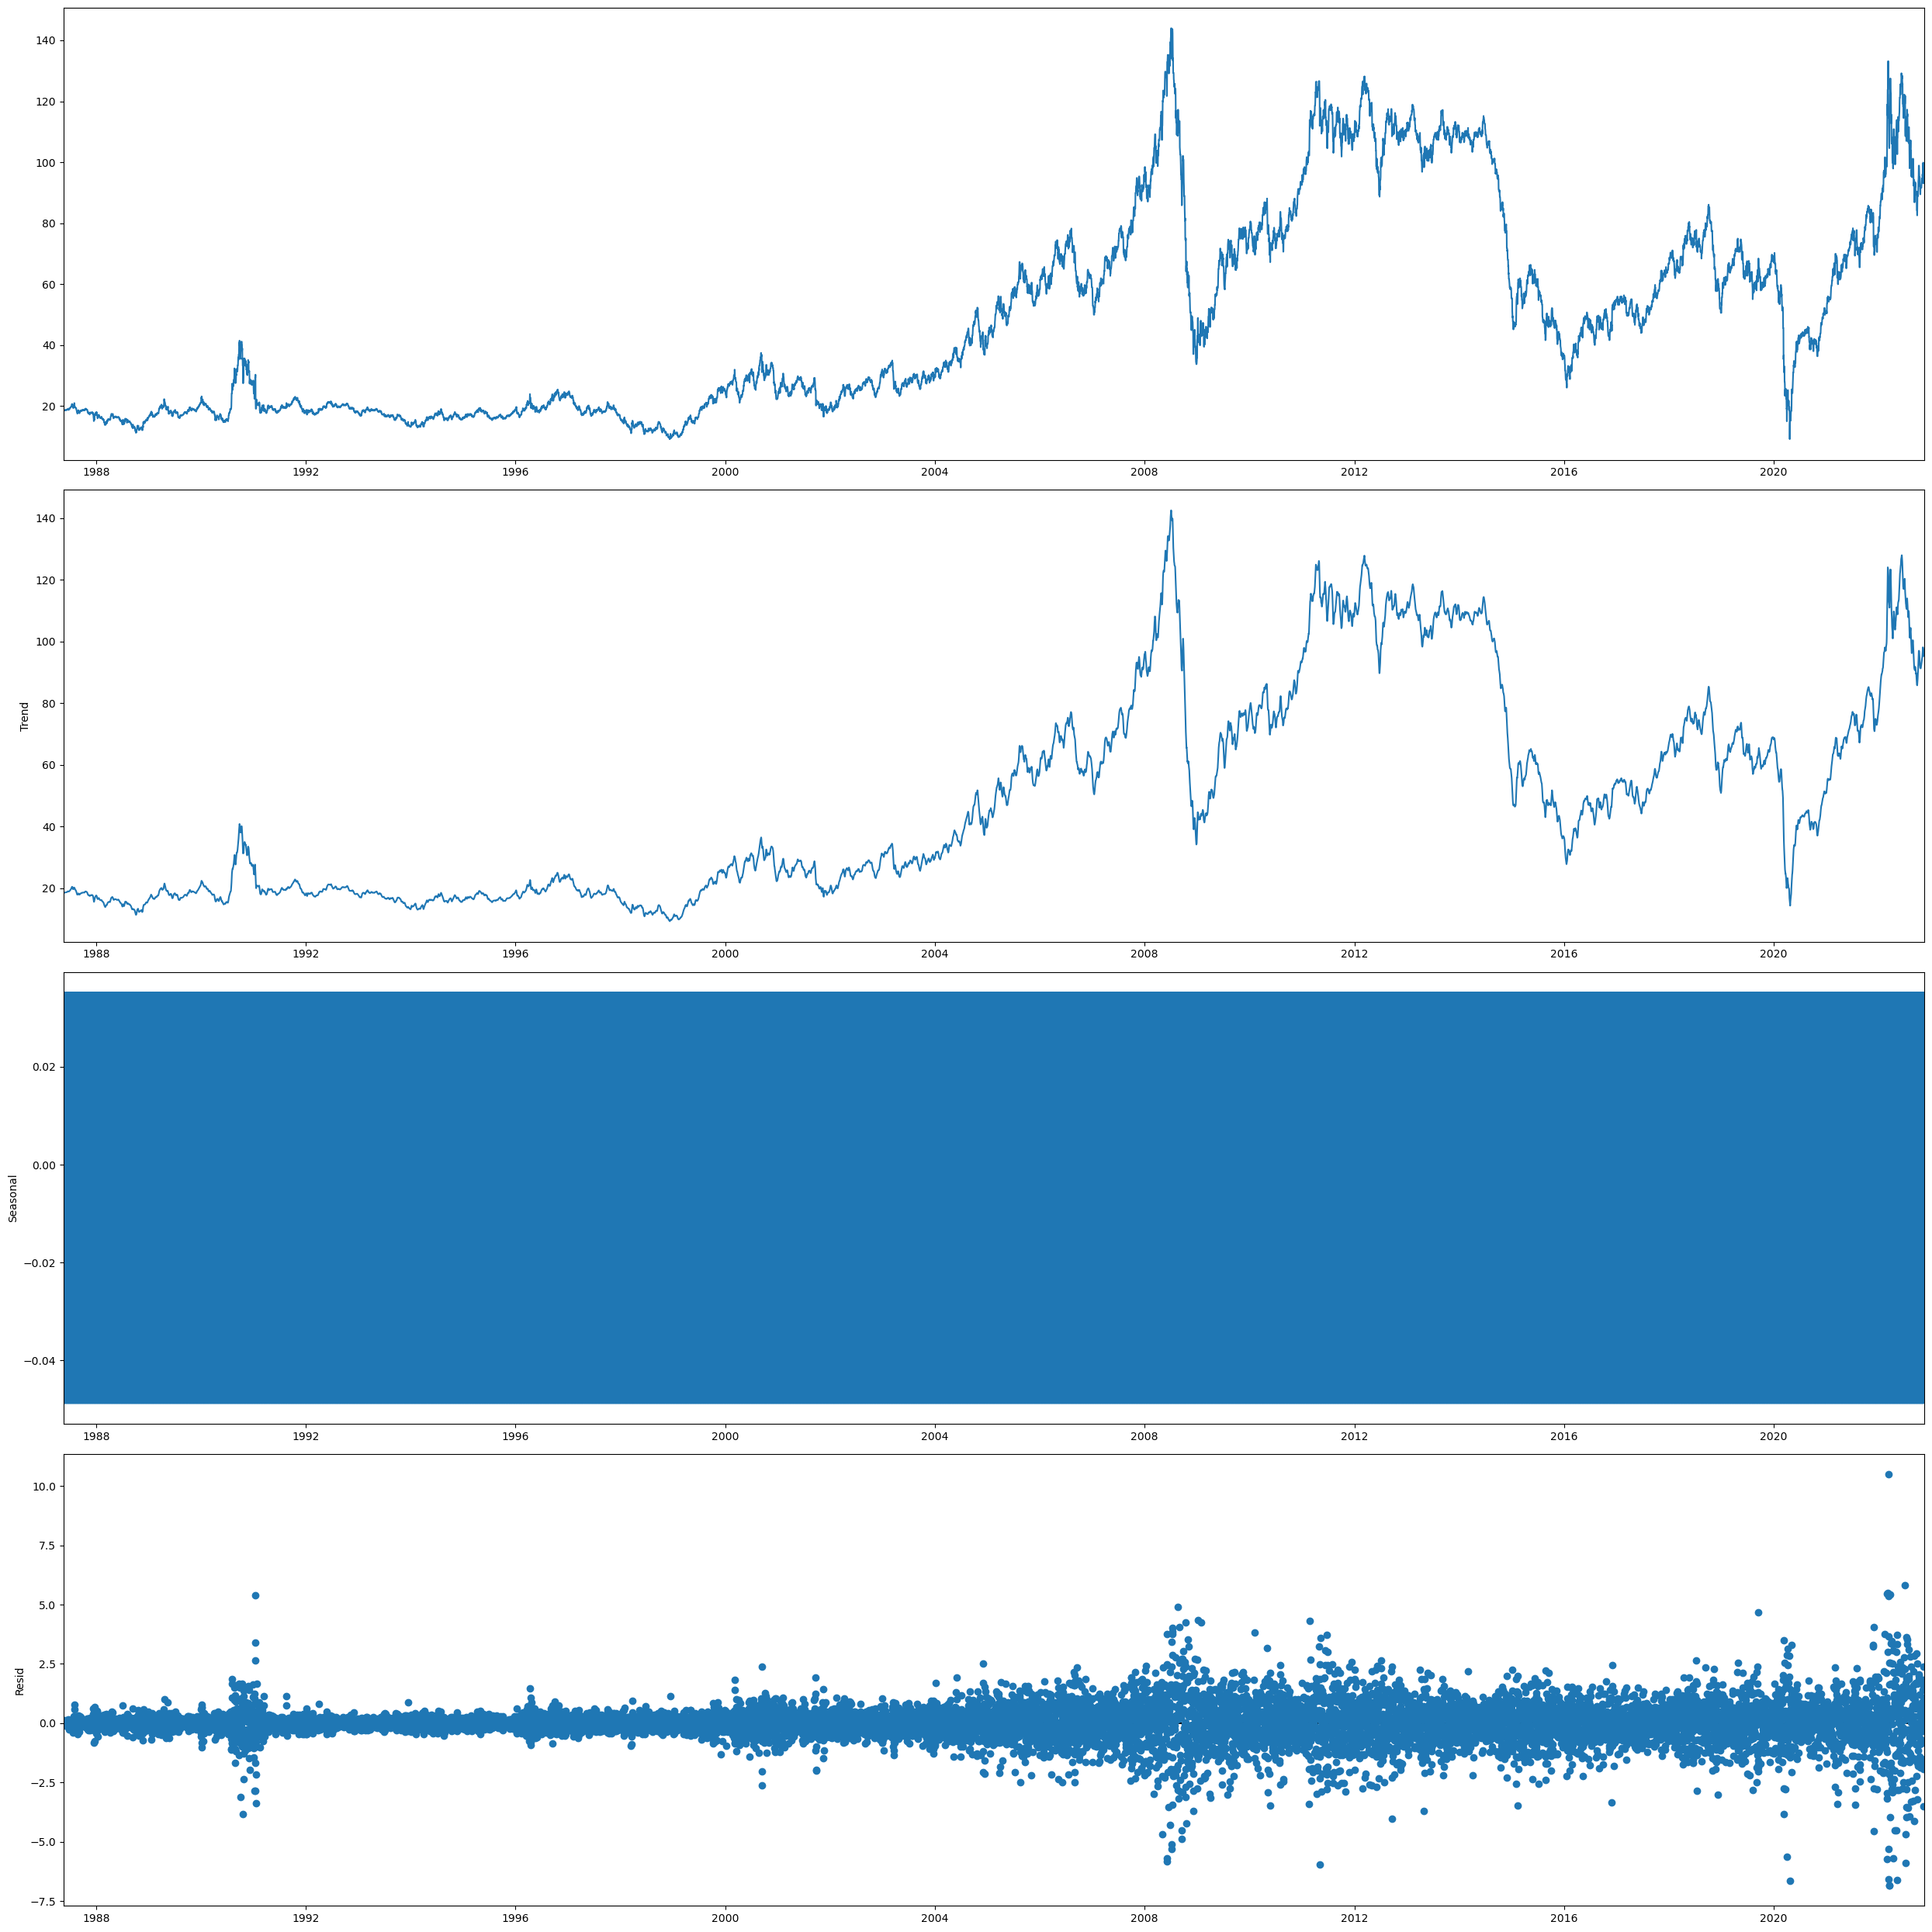

In [176]:
res = seasonal_decompose(df)
plt.rc('figure', figsize=(25, 25))
resplot = res.plot()

In [177]:
df_stat = adfuller(df)

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный') # 100% верно
else:
    print('Единичных корней нет (возможно, ряд стационарен)') # не всегда верно

The Augmented Dickey-Fuller test statistic -1.948822, 
pvalue: 0.31
critical values: {'1%': -3.4308561991797255, '5%': -2.8617637154959716, '10%': -2.566889078817277}
Есть единичные корни - ряд нестационарный


In [178]:
mod = ARIMA(df)
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                12963
Model:                          ARIMA   Log Likelihood              -63710.875
Date:                Thu, 20 Nov 2025   AIC                         127425.749
Time:                        10:44:12   BIC                         127440.689
Sample:                    05-20-1987   HQIC                        127430.742
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.5261      0.381    127.434      0.000      47.780      49.272
sigma2      1087.6984     21.359     50.924      0.000    1045.835    1129.562
Ljung-Box (L1) (Q):               12951.06   Jarque-

In [147]:
for i in range(3651):
    df[f'lag_{i}'] = df['Price'].shift(i) 

In [148]:
df.head()

,Price,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_3641,lag_3642,lag_3643,lag_3644,lag_3645,lag_3646,lag_3647,lag_3648,lag_3649,lag_3650
Date,,,,,,,,,,,,,,,,,,,,,
1987-05-20,18.63,18.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,18.45,18.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-22,18.55,18.55,18.45,18.63,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-23,18.55,18.55,18.55,18.45,18.63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-24,18.55,18.55,18.55,18.55,18.45,18.63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df.dropna(inplace=True)

In [156]:
df

,Price,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_3641,lag_3642,lag_3643,lag_3644,lag_3645,lag_3646,lag_3647,lag_3648,lag_3649,lag_3650
Date,,,,,,,,,,,,,,,,,,,,,
1997-05-17,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,18.62,...,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55,18.45,18.63
1997-05-18,19.77,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,...,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55,18.45
1997-05-19,19.92,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,...,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55
1997-05-20,19.75,19.75,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,...,18.65,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55
1997-05-21,19.70,19.70,19.75,19.92,19.77,19.77,19.77,19.40,19.10,19.40,...,18.68,18.65,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10,94.25,94.25,93.05,96.85,99.87,99.53,99.53,99.53,95.29,96.07,...,110.81,110.01,110.06,106.81,106.81,106.81,110.07,109.66,108.82,110.23
2022-11-11,96.37,96.37,94.25,93.05,96.85,99.87,99.53,99.53,99.53,95.29,...,110.81,110.81,110.01,110.06,106.81,106.81,106.81,110.07,109.66,108.82
2022-11-12,96.37,96.37,96.37,94.25,93.05,96.85,99.87,99.53,99.53,99.53,...,110.14,110.81,110.81,110.01,110.06,106.81,106.81,106.81,110.07,109.66


### Разбиение данных на train и test 

In [158]:
X_train = df_train.drop('Price', axis = 1)
y_train = df_train['Price'] 

X_test = df_train.drop('Price', axis=1)
y_test =  df_test['Price']

In [159]:
X_train

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_3641,lag_3642,lag_3643,lag_3644,lag_3645,lag_3646,lag_3647,lag_3648,lag_3649,lag_3650
Date,,,,,,,,,,,,,,,,,,,,,
1997-05-17,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,18.62,18.32,...,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55,18.45,18.63
1997-05-18,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,18.62,...,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55,18.45
1997-05-19,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,...,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55
1997-05-20,19.75,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,...,18.65,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55
1997-05-21,19.70,19.75,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,...,18.68,18.65,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-28,121.19,121.19,119.81,116.41,115.77,115.13,113.63,113.63,113.63,113.22,...,97.57,100.05,101.14,98.65,97.74,98.63,98.63,98.63,103.86,103.85
2022-05-29,121.19,121.19,121.19,119.81,116.41,115.77,115.13,113.63,113.63,113.63,...,97.57,97.57,100.05,101.14,98.65,97.74,98.63,98.63,98.63,103.86
2022-05-30,123.01,121.19,121.19,121.19,119.81,116.41,115.77,115.13,113.63,113.63,...,97.57,97.57,97.57,100.05,101.14,98.65,97.74,98.63,98.63,98.63


In [161]:
y = pd.concat([y_train, y_test], axis=0)
X = pd.concat([X_train, X_test], axis=0)

errors = []

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = ElasticNet()
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    errors.append(median_absolute_error(preds,y_test))
np.mean(errors)

IndexError: index 9313 is out of bounds for axis 0 with size 9313

In [162]:
X

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_3641,lag_3642,lag_3643,lag_3644,lag_3645,lag_3646,lag_3647,lag_3648,lag_3649,lag_3650
Date,,,,,,,,,,,,,,,,,,,,,
1997-05-17,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,18.62,18.32,...,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55,18.45,18.63
1997-05-18,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,18.62,...,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55,18.45
1997-05-19,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,18.62,...,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55,18.55
1997-05-20,19.75,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,18.62,...,18.65,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55,18.55
1997-05-21,19.70,19.75,19.92,19.77,19.77,19.77,19.40,19.10,19.40,19.42,...,18.68,18.65,18.58,18.58,18.58,18.60,18.60,18.63,18.60,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-28,121.19,121.19,119.81,116.41,115.77,115.13,113.63,113.63,113.63,113.22,...,97.57,100.05,101.14,98.65,97.74,98.63,98.63,98.63,103.86,103.85
2022-05-29,121.19,121.19,121.19,119.81,116.41,115.77,115.13,113.63,113.63,113.63,...,97.57,97.57,100.05,101.14,98.65,97.74,98.63,98.63,98.63,103.86
2022-05-30,123.01,121.19,121.19,121.19,119.81,116.41,115.77,115.13,113.63,113.63,...,97.57,97.57,97.57,100.05,101.14,98.65,97.74,98.63,98.63,98.63


In [163]:
y

Date
1997-05-17    19.77
1997-05-18    19.77
1997-05-19    19.92
1997-05-20    19.75
1997-05-21    19.70
              ...  
2022-11-10    94.25
2022-11-11    96.37
2022-11-12    96.37
2022-11-13    96.37
2022-11-14    93.59
Freq: D, Name: Price, Length: 9313, dtype: float64